In [ ]:
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

Upload Images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

origin_path = '/content/drive/My Drive/Colab Notebooks/Metamaterials AI/Metamaterials_AI/'
destination_path = '/content/drive/My Drive/Colab Notebooks/Metamaterials AI/Preprocessed_Images/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Functions

Take out yellow and red pixels

In [ ]:
def remove_noise(image):
  # Convert the image from BGR to HSV
  hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

  # Define broader bounds for yellow color in HSV
  lower_yellow = np.array([10, 50, 50])
  upper_yellow = np.array([40, 255, 255])

  # Define broader bounds for red color in HSV
  lower_red1 = np.array([0, 50, 50])
  upper_red1 = np.array([10, 255, 255])
  lower_red2 = np.array([160, 50, 50])
  upper_red2 = np.array([180, 255, 255])

  # Create masks for yellow and red colors
  yellow_mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)
  red_mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
  red_mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
  red_mask = red_mask1 + red_mask2

  # Combine the masks to get the final mask
  final_mask = yellow_mask + red_mask

  # Apply the mask to the original image
  result = cv2.bitwise_and(image, image, mask=final_mask)
  return result

# Convert and save each images

One Example

In [ ]:
image = cv2.imread(origin_path + 'Good Image/augmented_0.jpg')
image_array = np.array(image)
print(image_array[250][250])
print("Shape of the image arrayay:", image_array.shape)

[205 254 255]
Shape of the image arrayay: (525, 700, 3)


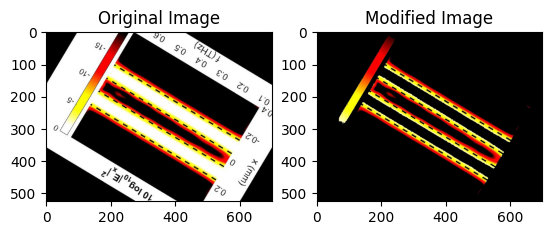

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(remove_noise(image), cv2.COLOR_BGR2RGB))
plt.title('Modified Image')

plt.show()

# Good Images

In [ ]:
folder_path = origin_path + 'Good Image/'

# Get the list of all files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

for file_name in image_files:
  # Construct the full path to the image file
  image_path = os.path.join(folder_path, file_name)

  # read image
  image = cv2.imread(image_path)

  # modify image
  modified_image = remove_noise(image)

  # Save the filtered image
  output_path = destination_path + 'Good Image/' + file_name
  cv2.imwrite(output_path, modified_image)

# Bad Images

In [ ]:
folder_path = origin_path + 'Bad Image/'

# Get the list of all files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

for file_name in image_files:
  # Construct the full path to the image file
  image_path = os.path.join(folder_path, file_name)

  # read image
  image = cv2.imread(image_path)

  # modify image
  modified_image = remove_noise(image)

  # Save the filtered image
  output_path = destination_path + 'Bad Image/' + file_name
  cv2.imwrite(output_path, modified_image)